In [7]:
#******************************************************************************
#QUESTION #03: PURCHASING INSURANCE PREDICTION 
#The data above contains 4630 real customer records. Each record consists of 86
#variables, containing sociodemographic data (variables 1-43) and product 
#ownership (variables 44-86). The sociodemographic data is derived from zip 
#codes. All customers living in areas with the same zip code have the same 
#sociodemographic attributes. Variable 86 (Purchase) indicates whether the
#customer purchased a caravan insurance policy.
#******************************************************************************
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit

In [8]:
Caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
Caravan_train

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
3,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,No
4,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,No
5,11,2,3,3,3,3,5,0,2,7,...,0,0,0,1,0,0,0,0,0,No
6,10,1,4,3,3,1,4,1,4,7,...,0,0,0,0,0,0,0,0,0,No
7,9,1,3,3,3,1,3,2,4,7,...,0,0,0,1,0,0,0,0,0,No
8,33,1,2,3,8,1,4,1,4,6,...,0,0,0,0,0,0,0,0,0,No
9,41,1,3,3,10,0,5,0,4,7,...,0,0,0,0,0,0,0,0,0,No


In [9]:
#DATA CLEAN UP
#MAKING THE RESPONSE VARIABLE "Purchase" NUMERICAL BY MAKING LIST, TURNING 
#LIST INTO ARRAY AND BY ADDING NEW COLUMN TO END OF THE DATA FRAME WITH LOOP

#SAVING THE STRING
a = Caravan_train.Purchase[34]
#MAKING INDEX
i = 0
terminate = 4630
#DECLARING LIST
lis = []
while(i < terminate):
    st = Caravan_train.Purchase[i]
    if(st == a):
        v = 1
    else:
        v = 0
    #APPEND
    lis.append(v)
    #INCREMENT INDEX
    i = i + 1

In [10]:
#CONVERTING LIS TO ARRAY
a_ray = np.asarray(lis)
#MAKING ARRAY INTO PANDAS DATA FRAME
B = pd.DataFrame(a_ray)
B.columns = ['Purchase_binary']
CT2 = pd.concat([Caravan_train,B], axis=1)
vCT2 = CT2
vCT2.shape
vCT2 = vCT2.drop(columns="Purchase")
vCT2
vCT2.head()

target = vCT2['Purchase_binary']
features = vCT2.drop(['Purchase_binary'], axis=1)

sss = StratifiedShuffleSplit(target, 10, test_size=0.3, random_state=0)
for train_index, test_index in sss:
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = target[train_index], target[test_index]
features.describe()
target.value_counts()

0    4346
1     284
Name: Purchase_binary, dtype: int64

C:\Users\Maria-Eugenia\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


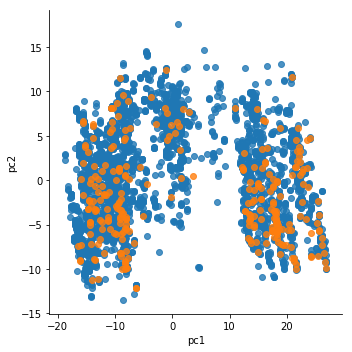

In [11]:
#Exploritory Data Analysis (EDA)

#SCATTERPLOT OF PRINCIPAL COMPONENTS  
A=features.as_matrix()
A
pca=PCA(n_components=2)
PC = pca.fit_transform(A)
#FIRST TWO DIMENSIONS OF PRINCIPAL COMPONENETS
pc2 = pca.components_
#DF OF PRINCIPAL COMPONENTS
pDF = pd.DataFrame(data = PC, columns = ['pc1','pc2'])
R=pd.concat([pDF,B], axis=1)
R
#PLOT
sns.lmplot(x = 'pc1', y = 'pc2', data = R, fit_reg = False, hue = 'Purchase_binary', legend = False)
       

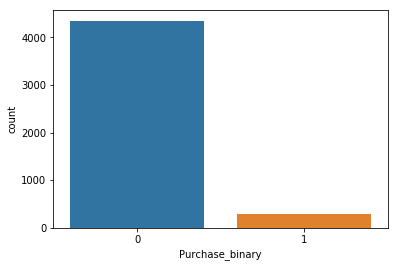

In [12]:
#COUNTPLOT
sns.countplot(x='Purchase_binary', data=vCT2);

In [13]:
#LOGISTIC REGRESSION
#Rather than modeling this response Y directly, logistic regression models the 
#probability that Y belongs to a particular category.
#PROS:
#(#01) low Variance
#(#02) Provides high probabilities for outcomes
#CONS:
#(#01) High bias 
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
test_predictions1 = LR.predict(X_test)
#Check to see if response is binary NOT probabilistic
test_predictions1  
report1 = classification_report(y_test, test_predictions1)
print(confusion_matrix(y_test, test_predictions1))
print(report1)
print("Accuracy of this test: ")
print(accuracy_score(y_test, test_predictions1))
#AUROC SCORE
print("Area under the ROC curve: ")
roc_auc_score(y_test, test_predictions1)

[[1300    4]
 [  84    1]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      1304
          1       0.20      0.01      0.02        85

avg / total       0.89      0.94      0.91      1389

Accuracy of this test: 
0.9366450683945284
Area under the ROC curve: 


0.5043486106098881

In [14]:
#RANDOM FOREST
#RANDOM FOREST
#Random forests are an ensemble learning method for classification, regression 
#and other tasks, that operate by constructing a multitude of decision trees at 
#training time and outputting the class that is the mode of the classes or mean 
#prediction of the individual trees.
#PROS:
#(#01) Decorrelates trees (Relative to regular trees)
#(#02) Reduced Variance (Relative to regular trees)
#CONS:
#(#01) Not as easy to interpret (Relative to regular trees)
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
test_predictions2 = RFC.predict(X_test)
#Check to see if response is binary NOT probabilistic
test_predictions2 
report2 = classification_report(y_test, test_predictions2)
print(confusion_matrix(y_test, test_predictions2)) 
print(report2)
print("Accuracy of this test: ")
print(accuracy_score(y_test, test_predictions2))
#AUROC SCORE
print("Area under the ROC curve: ")
roc_auc_score(y_test, test_predictions2)

[[1283   21]
 [  79    6]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1304
          1       0.22      0.07      0.11        85

avg / total       0.90      0.93      0.91      1389

Accuracy of this test: 
0.9280057595392368
Area under the ROC curve: 


0.527241970407795

In [15]:
#K NEAREST NEIGHBORS
#In pattern recognition, the k-nearest neighbors algorithm is a non-parametric 
#method used for classification and regression. In both cases, the input 
#consists of the k closest training examples in the feature space.
#PROS:
#(#01) No assumption about the data
#(02) High accuracy 
#CONS:
#(#01) Must have a meaningful distance function
#(#02) Storage of data
KNC = KNeighborsClassifier(n_neighbors=5)  
KNC.fit(X_train, y_train) 
test_predictions3 = KNC.predict(X_test) 
#Check to see if response is binary NOT probabilistic
test_predictions3
report3 = classification_report(y_test, test_predictions3)  
print(confusion_matrix(y_test, test_predictions3)) 
print(report3) 
print("Accuracy of this test: ")
print(accuracy_score(y_test, test_predictions3))
#AUROC SCORE
print("Area under the ROC curve: ")
roc_auc_score(y_test, test_predictions3)

[[1298    6]
 [  84    1]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      1304
          1       0.14      0.01      0.02        85

avg / total       0.89      0.94      0.91      1389

Accuracy of this test: 
0.9352051835853131
Area under the ROC curve: 


0.5035817394442439

In [16]:
#NAIVE BAYS
#In machine learning, naive Bayes classifiers are a family of simple 
#"probabilistic classifiers" based on applying Bayes' theorem with strong 
#independence assumptions between the features.
#PROS:
#(#01) Works well in high dimensions 
#CONS:
#(#01) Relies on independence assumption
NB = GaussianNB()                       
NB.fit(X_train, y_train)
test_predictions4 = NB.predict(X_test)
#Check to see if response is binary NOT probabilistic
test_predictions4
report4 = classification_report(y_test, test_predictions4) 
print(confusion_matrix(y_test, test_predictions4)) 
print(report4) 
print("Accuracy of this test: ")
print(accuracy_score(y_test, test_predictions4))
#AUROC SCORE
print("Area under the ROC curve: ")
roc_auc_score(y_test, test_predictions4) 

[[ 178 1126]
 [   7   78]]
             precision    recall  f1-score   support

          0       0.96      0.14      0.24      1304
          1       0.06      0.92      0.12        85

avg / total       0.91      0.18      0.23      1389

Accuracy of this test: 
0.18430525557955363
Area under the ROC curve: 


0.5270750631540959

In [17]:
P =  LR.predict_proba(X_test)[:,1]
P
P = pd.DataFrame(P)
Q = pd.merge(Caravan_train, P, left_index=True, right_index=True)
list(Q)
S=Q.sort_values(by=0, ascending=False)
P=S[0]
P.head(50)

972     0.829517
1058    0.666330
96      0.616249
1000    0.572674
896     0.568813
663     0.475666
768     0.471445
746     0.467864
219     0.422434
373     0.416434
855     0.399426
6       0.387880
800     0.383356
1098    0.361042
1325    0.361032
882     0.360664
228     0.353595
697     0.340649
64      0.336470
1029    0.335862
4       0.335852
213     0.329031
657     0.322189
901     0.316214
1014    0.307759
705     0.302576
1226    0.298975
420     0.296646
368     0.296224
149     0.291167
1145    0.291166
132     0.291061
497     0.286283
739     0.286181
1119    0.275359
1276    0.272686
788     0.269504
1247    0.269407
958     0.265248
1199    0.263696
342     0.262922
661     0.262407
1127    0.262407
770     0.261015
843     0.256241
1140    0.254542
357     0.252912
1141    0.252677
1311    0.252677
1388    0.251863
Name: 0, dtype: float64